<a href="https://colab.research.google.com/github/yuqingg3/Housing-AI/blob/main/HousingAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import datasets, ensemble
import matplotlib.pyplot as plt
import math


In [8]:
df = pd.read_csv(r'/content/sample_data/california_housing_test.csv')
this_df=df[["median_house_value","total_rooms"]]


In [9]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


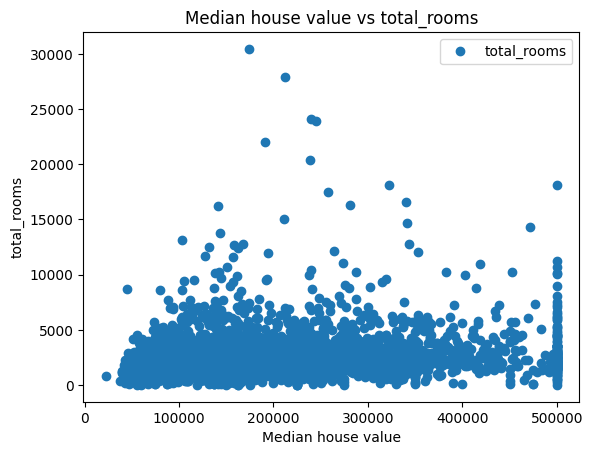

In [10]:
this_df.plot(x='median_house_value', y='total_rooms', style = 'o')
plt.title("Median house value vs total_rooms")
plt.xlabel("Median house value")
plt.ylabel("total_rooms")
plt.show()

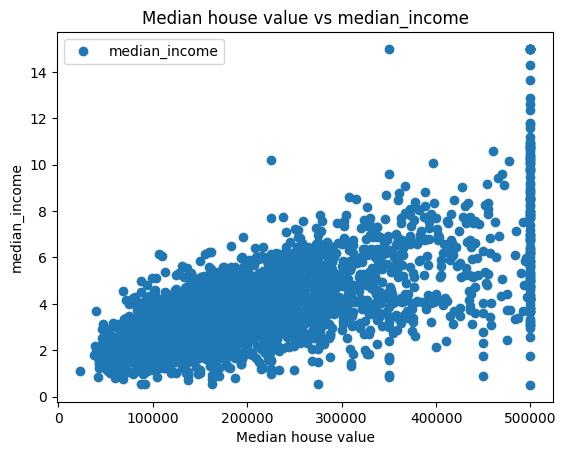

In [22]:
this_df2=df[["median_house_value","median_income"]]
this_df2.plot(x='median_house_value', y='median_income', style = 'o')
plt.title("Median house value vs median_income")
plt.xlabel("Median house value")
plt.ylabel("median_income")
plt.show()

In [11]:
import numpy as np

rs = np.random.RandomState(0)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925017,-0.064203,0.049865,0.070869,0.111572,0.051062,-0.018701,-0.050662
latitude,-0.925017,1.000000,-0.025143,-0.039632,-0.068245,-0.117318,-0.068296,-0.072363,-0.138428
housing_median_age,-0.064203,-0.025143,1.000000,-0.367850,-0.323154,-0.299888,-0.305171,-0.144315,0.091409
total_rooms,0.049865,-0.039632,-0.367850,1.000000,0.937749,0.838867,0.914116,0.221249,0.160427
total_bedrooms,0.070869,-0.068245,-0.323154,0.937749,1.000000,0.856387,0.970758,0.024025,0.082279
population,0.111572,-0.117318,-0.299888,0.838867,0.856387,1.000000,0.895530,0.032361,-0.001192
households,0.051062,-0.068296,-0.305171,0.914116,0.970758,0.895530,1.000000,0.048625,0.100176
median_income,-0.018701,-0.072363,-0.144315,0.221249,0.024025,0.032361,0.048625,1.000000,0.672695
median_house_value,-0.050662,-0.138428,0.091409,0.160427,0.082279,-0.001192,0.100176,0.672695,1.000000


LINEAR REGRESSOR

In [12]:
x = df.drop(columns = ['total_rooms','median_income','households','total_bedrooms','households'])
y = df['median_house_value']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [14]:
regresor = LinearRegression()
regresor.fit(x_train, y_train)
y_pred_LinearRegression=regresor.predict(x_test)
dfe = pd.DataFrame({'Actual': [y_test], 'Predicted': [y_pred_LinearRegression]})
dfe
print("MSE (Linear Regression)", mean_squared_error(y_test,y_pred_LinearRegression))
print("RMSE (Linear Regression)", math.sqrt(mean_squared_error(y_test,y_pred_LinearRegression)))



MSE (Linear Regression) 1.0162630715078158e-20
RMSE (Linear Regression) 1.0080987409514088e-10


In [15]:
from sklearn import metrics

In [16]:
regresor = LinearRegression()
regresor.fit(x_train, y_train)
y_pred_LinearRegression=regresor.predict(x_test)
dfe = pd.DataFrame({'Actual': [y_test], 'Predicted': [y_pred_LinearRegression]})
dfe
print("MSE (Linear Regression)", mean_squared_error(y_test,y_pred_LinearRegression))
print("RMSE (Linear Regression)", math.sqrt(mean_squared_error(y_test,y_pred_LinearRegression)))

errors = abs(y_pred_LinearRegression - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(y_test)
print('Accuracy:', round(accuracy, 2), '%.')

MSE (Linear Regression) 1.0162630715078158e-20
RMSE (Linear Regression) 1.0080987409514088e-10
Accuracy: -209895.05 %.


RAMDOM FOREST REGRESSOR

In [17]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(x_train, y_train)
y_pred_random_forest = rf_regressor.predict(x_test)
print("MSE (Random Forest):", mean_squared_error(y_test, y_pred_random_forest))
print("RMSE (Random Forest)", math.sqrt(mean_squared_error(y_test,y_pred_random_forest)))

MSE (Random Forest): 71290.6897335
RMSE (Random Forest) 267.00316427619356


In [18]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(x_train, y_train)
y_pred_decision_tree = dt_regressor.predict(x_test)
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
print("MSE (Decision Tree):", mse_decision_tree)
rmse_decision_tree = math.sqrt(mse_decision_tree)
print("RMSE (Decision Tree):", rmse_decision_tree)

MSE (Decision Tree): 213666.66666666666
RMSE (Decision Tree): 462.24091842530197


In [19]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np
svm_regressor = SVR(kernel='rbf')
svm_regressor.fit(x_train, y_train)
y_pred_svm = svm_regressor.predict(x_test)
mse_svm = mean_squared_error(y_test, y_pred_svm)
print("MSE (SVM):", mse_svm)
rmse_svm = np.sqrt(mse_svm)
print("RMSE (SVM):", rmse_svm)

MSE (SVM): 14501772060.587603
RMSE (SVM): 120423.30364421831


In [20]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(x_train, y_train)
y_pred_gradient_boosting = gb_regressor.predict(x_test)
mse_gradient_boosting = mean_squared_error(y_test, y_pred_gradient_boosting)
print("MSE (Gradient Boosting):", mse_gradient_boosting)
rmse_gradient_boosting = np.sqrt(mse_gradient_boosting)
print("RMSE (Gradient Boosting):", rmse_gradient_boosting)

MSE (Gradient Boosting): 819405.6636768461
RMSE (Gradient Boosting): 905.2102869923906


Note: MSE and RMSE are too high, what can be done to reduce?

Gradient Boosting Regression

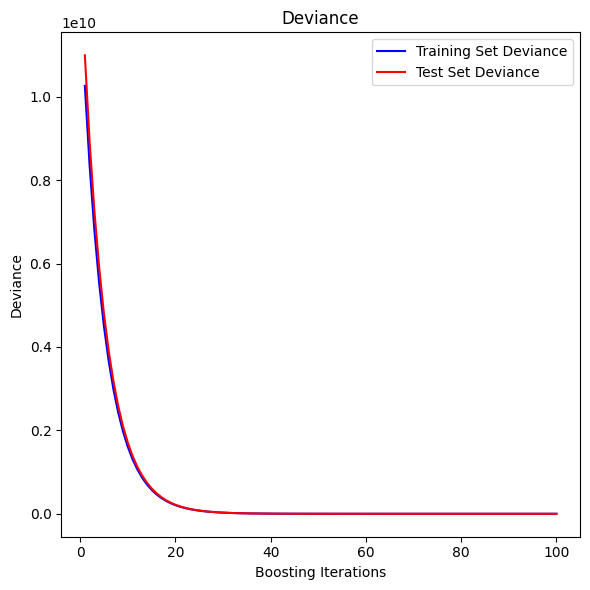

In [23]:
test_score = np.zeros((gb_regressor.n_estimators,), dtype=np.float64)
for i, y_pred in enumerate(gb_regressor.staged_predict(x_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(gb_regressor.n_estimators) + 1,
    gb_regressor.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(gb_regressor.n_estimators) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()